# Overview

This notebook generates synthetic cyber activity data for red vs blue team exercises. The data is designed for machine learning tasks such as classification, anomaly detection, and behavioral analysis. The output is a CSV file with metadata describing the dataset.

**Red Team:** Simulates adversary actions (e.g., attacks, scans).
**Blue Team:** Simulates defender actions (e.g., mitigations, responses).

---

# Red vs Blue Cyber Activity Data Generator

This notebook generates simulated cyber activity data for red vs blue exercises. The output is a labeled dataset suitable for machine learning tasks, saved as a CSV file in `data/raw/red_vs_blue/`.

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [31]:
# Define parameters for synthetic data
data_size = 1000
start_time = datetime(2025, 1, 1)
activity_types = ['red', 'blue']
protocols = ['TCP', 'UDP', 'ICMP', 'HTTP', 'HTTPS']

# Helper function to generate random IP addresses
def random_ip():
    return f"{random.randint(1, 255)}.{random.randint(0, 255)}.{random.randint(0, 255)}.{random.randint(1, 254)}"

# Generate synthetic data
rows = []
for i in range(data_size):
    timestamp = start_time + timedelta(seconds=random.randint(0, 86400))
    src_ip = random_ip()
    dst_ip = random_ip()
    protocol = random.choice(protocols)
    activity = random.choice(activity_types)
    event_details = (
        f"{activity.upper()} - {protocol} connection from {src_ip} to {dst_ip}"
        if activity == 'red' else
        f"{activity.upper()} - Defensive action on {dst_ip}"
    )
    rows.append({
        'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S'),
        'src_ip': src_ip,
        'dst_ip': dst_ip,
        'protocol': protocol,
        'activity_type': activity,
        'event_details': event_details
    })

# Create DataFrame
df_raw = pd.DataFrame(rows)
df_raw.head()

,timestamp,src_ip,dst_ip,protocol,activity_type,event_details
0,2025-01-01 23:16:50,29.12.140.63,58.71.52.174,HTTPS,red,RED - HTTPS connection from 29.12.140.63 to 58...
1,2025-01-01 21:29:57,109.16.15.24,56.119.13.144,UDP,blue,BLUE - Defensive action on 56.119.13.144
2,2025-01-01 08:01:33,115.142.3.195,207.81.216.88,ICMP,red,RED - ICMP connection from 115.142.3.195 to 20...
3,2025-01-01 07:50:21,246.172.52.24,98.49.183.217,ICMP,blue,BLUE - Defensive action on 98.49.183.217
4,2025-01-01 01:34:55,187.235.63.250,237.193.40.142,ICMP,blue,BLUE - Defensive action on 237.193.40.142


In [32]:
# Add metadata to CSV file
import os


metadata = [
    ['# Metadata:'],
    ['# Simulated red vs blue cyber activity data for ML tasks'],
    ['# Columns: timestamp, src_ip, dst_ip, protocol, activity_type, event_details'],
    ['# activity_type: "red" = adversary, "blue" = defender'],
    ['# Generated on: ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')]
]

output_path = '../../../data/raw/red_vs_blue/simulated_red_vs_blue_activity.csv'

# Write metadata and data to CSV
with open(output_path, 'w') as f:
    for meta in metadata:
        f.write(','.join(meta) + '\n')
    df_raw.to_csv(f, index=False)
print(f"Simulated data with metadata saved to {output_path}")

Simulated data with metadata saved to ../../../data/raw/red_vs_blue/simulated_red_vs_blue_activity.csv


---

## Steps in This Notebook

1. **Import Libraries:** Load required Python packages for data generation and manipulation.
2. **Set Parameters:** Define the size and structure of the synthetic dataset.
3. **Generate Data:** Create random cyber activity events for red and blue teams.
4. **Save Data:** Write the generated data and metadata to a CSV file for downstream ML tasks.

---

## Output

The generated CSV file includes:
- **Metadata:** Description of the dataset, columns, and activity types.
- **Data Columns:**
    - `timestamp`: Date and time of the event
    - `src_ip`: Source IP address
    - `dst_ip`: Destination IP address
    - `protocol`: Network protocol used
    - `activity_type`: 'red' (adversary) or 'blue' (defender)
    - `event_details`: Description of the event

You can use this data for training and evaluating machine learning models in cyber defense and attack scenarios.

---

## Data Processing

This section loads the raw dataset, normalizes IP addresses, encodes categorical features, and saves a processed version for machine learning tasks.

In [33]:
# Load raw data
raw_path = '../../../data/raw/red_vs_blue/simulated_red_vs_blue_activity.csv'
# Skip metadata rows
processed_df = pd.read_csv(raw_path, comment='#')

# Normalize IP addresses (convert to integer representation)
def ip_to_int(ip):
    parts = [int(x) for x in ip.split('.')]
    return (parts[0]<<24) + (parts[1]<<16) + (parts[2]<<8) + parts[3]
processed_df['src_ip_int'] = processed_df['src_ip'].apply(ip_to_int)
processed_df['dst_ip_int'] = processed_df['dst_ip'].apply(ip_to_int)

# Encode categorical features
processed_df['protocol_code'] = processed_df['protocol'].astype('category').cat.codes
processed_df['activity_label'] = processed_df['activity_type'].map({'red': 1, 'blue': 0})

# Save processed data
processed_path = '../../../data/processed/red_vs_blue/processed_red_vs_blue_activity.csv'
processed_df.to_csv(processed_path, index=False)
print(f"Processed data saved to {processed_path}")

Processed data saved to ../../../data/processed/red_vs_blue/processed_red_vs_blue_activity.csv


---

## Data Visualization

This section provides visualizations for both the raw and processed red vs blue datasets to help understand the distribution and characteristics of the data.

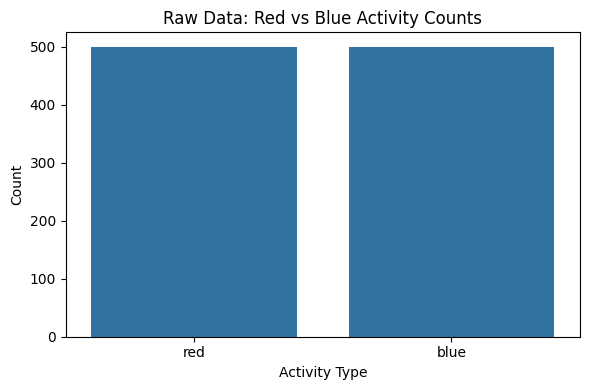

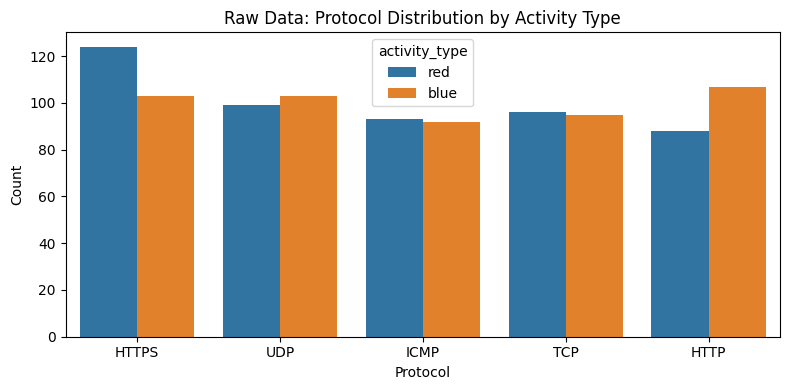

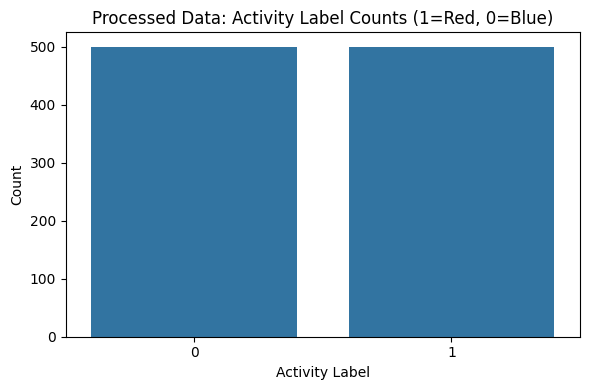

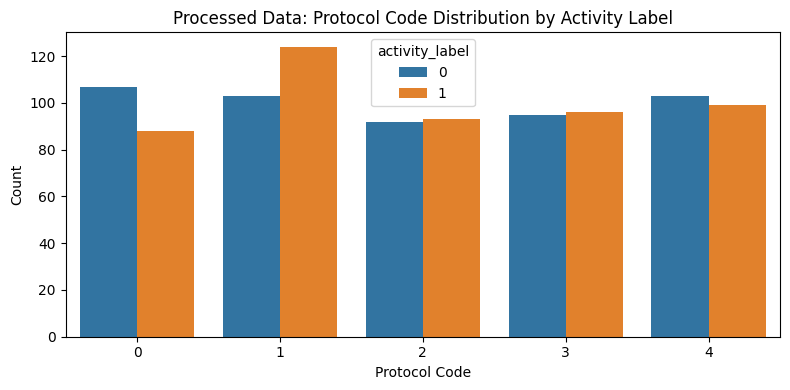

In [34]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize raw activity type counts
plt.figure(figsize=(6,4))
sns.countplot(x='activity_type', data=raw_df)
plt.title('Raw Data: Red vs Blue Activity Counts')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualize protocol distribution in raw data
plt.figure(figsize=(8,4))
sns.countplot(x='protocol', hue='activity_type', data=raw_df)
plt.title('Raw Data: Protocol Distribution by Activity Type')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualize processed activity label counts
plt.figure(figsize=(6,4))
sns.countplot(x='activity_label', data=processed_df)
plt.title('Processed Data: Activity Label Counts (1=Red, 0=Blue)')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualize processed protocol codes
plt.figure(figsize=(8,4))
sns.countplot(x='protocol_code', hue='activity_label', data=processed_df)
plt.title('Processed Data: Protocol Code Distribution by Activity Label')
plt.xlabel('Protocol Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [29]:
raw_df.head()

,timestamp,src_ip,dst_ip,protocol,activity_type,event_details,src_ip_int,dst_ip_int,protocol_code,activity_label
0,2025-01-01 23:16:50,29.12.140.63,58.71.52.174,HTTPS,red,RED - HTTPS connection from 29.12.140.63 to 58...,487361599,977745070,1,1
1,2025-01-01 21:29:57,109.16.15.24,56.119.13.144,UDP,blue,BLUE - Defensive action on 56.119.13.144,1829768984,947326352,4,0
2,2025-01-01 08:01:33,115.142.3.195,207.81.216.88,ICMP,red,RED - ICMP connection from 115.142.3.195 to 20...,1938686915,3478247512,2,1
3,2025-01-01 07:50:21,246.172.52.24,98.49.183.217,ICMP,blue,BLUE - Defensive action on 98.49.183.217,4138480664,1647425497,2,0
4,2025-01-01 01:34:55,187.235.63.250,237.193.40.142,ICMP,blue,BLUE - Defensive action on 237.193.40.142,3152756730,3988859022,2,0


---

## Train/Test Split

This section splits the processed dataset into training and test sets for machine learning experiments.

In [35]:
# Split processed data into train and test sets
from sklearn.model_selection import train_test_split

# Use processed data (raw_df)
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['activity_label'])

# Save splits
train_path = '../../../data/processed/red_vs_blue/train_red_vs_blue_activity.csv'
test_path = '../../../data/processed/red_vs_blue/test_red_vs_blue_activity.csv'
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
print(f"Train set saved to {train_path}\nTest set saved to {test_path}")

Train set saved to ../../../data/processed/red_vs_blue/train_red_vs_blue_activity.csv
Test set saved to ../../../data/processed/red_vs_blue/test_red_vs_blue_activity.csv
